## Install spaCy
From an elevated command prompt or Anaconda prompt, install spaCy

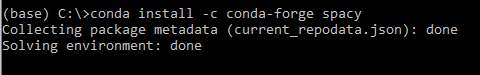

In [ ]:
import spacy

## Download spaCy Language Model
From your virtual envrionment, download the spaCy language model you
will be using. In this case, we download the English language model.

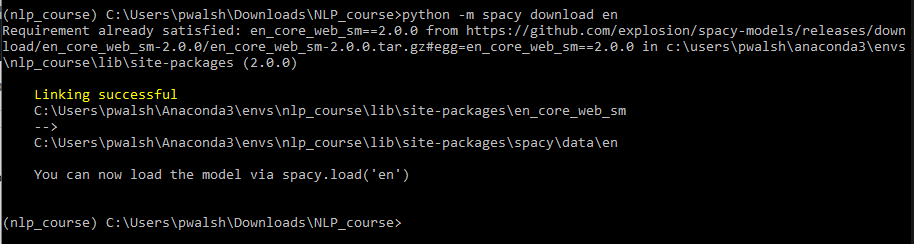

In [8]:
# nlp = spacy.load('en_core_web_sm')
nlp = spacy.load('en')

In [9]:
# create document object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

# Tokenization
The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information.

In [11]:
# each word will become a token
# token.poc gives you the part-of-speech numeric identifier 
for token in doc:
    print(token.text, token.pos)

Tesla 95
is 99
looking 99
at 84
buying 99
U.S. 95
startup 91
for 84
$ 98
6 92
million 92


In [12]:
# each word will become a token
# token.poc_ gives you the part-of-speech text identifier
for token in doc:
    print(token.text, token.pos_)

Tesla PROPN
is VERB
looking VERB
at ADP
buying VERB
U.S. PROPN
startup NOUN
for ADP
$ SYM
6 NUM
million NUM


In [13]:
# each word will become a token
# token.dep_ gives you syntactic dependancy
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is VERB aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


In [14]:
nlp.pipeline

[('tagger', <spacy.pipeline.Tagger at 0x203d8d9a488>),
 ('parser', <spacy.pipeline.DependencyParser at 0x203d8d9b048>),
 ('ner', <spacy.pipeline.EntityRecognizer at 0x203d8d9b5e8>)]

In [16]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [20]:
# create another document object as Unicode string u''
doc2 = nlp(u"Tesla isn't   looking into startups anymore.")

In [21]:
# each word will become a token
# token.dep_ gives you syntactic dependancy
for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is VERB aux
n't ADV neg
   SPACE 
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


In [24]:
# grab specific token in document object
doc2[0]

Tesla

In [25]:
# grab specific token in document object
doc2[0].pos_

'PROPN'

In [26]:
# grab specific token in document object
doc2[0].dep_

'nsubj'

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

In [27]:
# create another document object
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [52]:
# grab slice of index of document object
life_quote = doc3[16:30]

In [53]:
print(life_quote)

"Life is what happens to us while we are making other plans"


In [55]:
# the index of a document object is called a 'span'
type(life_quote)

spacy.tokens.span.Span

In [56]:
type(doc3)

spacy.tokens.doc.Doc

In [58]:
doc4 = nlp(u"This is the first sentence. This is another sentence. This is the last sentence.")

In [60]:
# grab specific sentences with .sents
for sentence in doc4.sents:
    print(sentence)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [62]:
# check if token in sentence is the start of a sentence
doc4[6].is_sent_start

True

In [63]:
# check if token in sentence is the start of a sentence
# returns nothing if FALSE, and 'True' if true.
doc4[7].is_sent_start

In [67]:
mystring = '"We\'re moving to L.A.!"'

In [68]:
mystring

'"We\'re moving to L.A.!"'

In [69]:
print(mystring)

"We're moving to L.A.!"


In [70]:
doc = nlp(mystring)

In [72]:
# spaCy automatically tokenizes Document objects
for token in doc:
    print(token.text)

"
We
're
moving
to
L.A.
!
"


In [76]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com, or visit us at http://www.oursite.com!")

In [77]:
for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
,
or
visit
us
at
http://www.oursite.com
!


In [78]:
doc3 = nlp(u"A 5km NYC cab ride costs $10.30")

In [79]:
for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


In [80]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

In [81]:
for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


In [82]:
len(doc3)

9

In [84]:
# check length of language library/model
len(doc4.vocab)

57853

In [86]:
doc5 = nlp(u"It is better to give than receive.")

In [87]:
doc5[2:5]

better to give

In [88]:
# Document objects cannot be modified once assigned:
doc5[0] = 'test'

TypeError: 'spacy.tokens.doc.Doc' object does not support item assignment

In [89]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

In [90]:
for token in doc8:
    print(token.text,end=' | ')

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 

In [91]:
# get Named Entities with docObj.ents
for entity in doc8.ents:
    print(entity)

Apple
Hong Kong
$6 million


In [96]:
# get Named Entities with docObj.ents
for entity in doc8.ents:
    print(entity, entity.label_, str(spacy.explain(entity.label_)))

Apple ORG Companies, agencies, institutions, etc.
Hong Kong GPE Countries, cities, states
$6 million MONEY Monetary values, including unit


In [99]:
# get noun phrases with docObj.noun_chunks
doc9 = nlp(u'Autonomous cars shift insurance liability toward manufacturers.')

In [100]:
for chunk in doc9.noun_chunks:
    print(chunk)

Autonomous cars
insurance liability
manufacturers


# Visualize tokens with displacy

In [112]:
from spacy import displacy

In [113]:
doc = nlp(u"Apple is going to build a U.K. factory for $6 million.")

In [114]:
# use style='dep' for syntactic dependancy visualization
displacy.render(doc, style='dep',jupyter=True,options={'distance':70})

In [115]:
doc = nlp(u"Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.")

In [116]:
# use style='ent' for named entity visualization

displacy.render(doc,style='ent',jupyter=True)

## Visualize displacy via Web Browser

In [109]:
doc = nlp(u"This is a sentence.")

In [110]:
displacy.serve(doc,style='dep')


    Serving on port 5000...
    Using the 'dep' visualizer



127.0.0.1 - - [09/Aug/2022 16:06:18] "GET / HTTP/1.1" 200 3057
127.0.0.1 - - [09/Aug/2022 16:06:19] "GET /favicon.ico HTTP/1.1" 200 3057



    Shutting down server on port 5000.



open browser and go to http://127.0.0.1:5000/

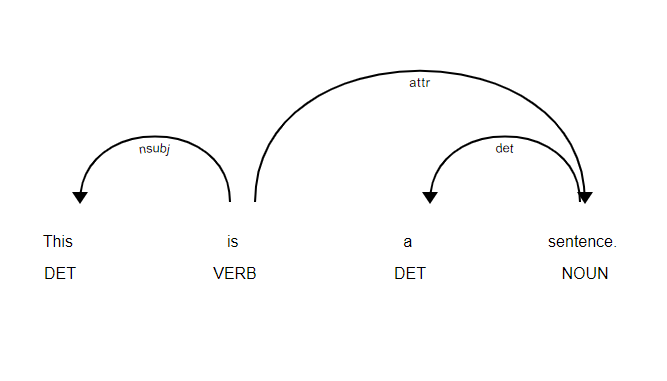